In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

In [ ]:
# Import csv file, determine the Performance column to be the output/label and all other columns to be the input features
df = pd.read_csv("")
y = df['Performance']
x = df.drop('Performance', axis=1)

# Encode all the binary categorical variables
le = LabelEncoder()
x['school'] = le.fit_transform(x['school'])
x['sex'] = le.fit_transform(x['sex'])
x['address'] = le.fit_transform(x['address'])
x['famsize'] = le.fit_transform(x['famsize'])
x['Pstatus'] = le.fit_transform(x['Pstatus'])
x['schoolsup'] = le.fit_transform(x['schoolsup'])
x['famsup'] = le.fit_transform(x['famsup'])
x['paid'] = le.fit_transform(x['paid'])
x['activities'] = le.fit_transform(x['activities'])
x['nursery'] = le.fit_transform(x['nursery'])
x['higher'] = le.fit_transform(x['higher'])
x['internet'] = le.fit_transform(x['internet'])
x['romantic'] = le.fit_transform(x['romantic'])

# Get dummies for all the non-binary nominal variables
x = pd.get_dummies(x, columns=['Mjob','Fjob','reason','guardian'])

# Set up all the testing and training data sets; 20 percent of the data will be the testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)


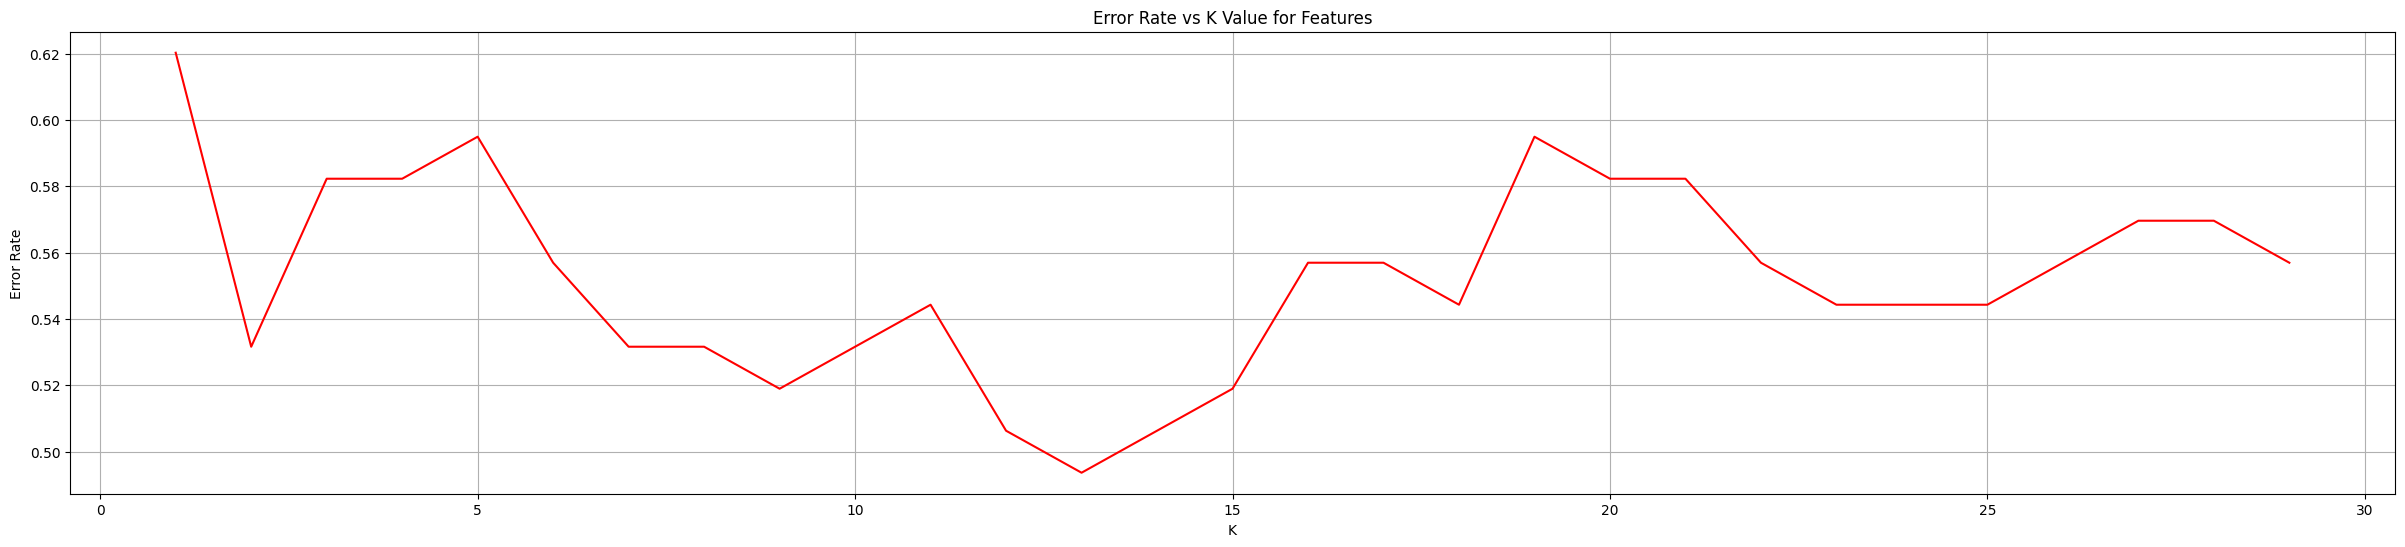

Accuracy for training data:  0.5284810126582279
Report for training data:                precision    recall  f1-score   support

        High       0.55      0.61      0.58       108
         Low       0.52      0.32      0.39        76
      Normal       0.51      0.58      0.54       132

    accuracy                           0.53       316
   macro avg       0.53      0.50      0.51       316
weighted avg       0.53      0.53      0.52       316

Accuracy for testing data:  0.5063291139240507
Report for testing data:                precision    recall  f1-score   support

        High       0.54      0.61      0.57        23
         Low       0.60      0.35      0.44        26
      Normal       0.45      0.57      0.50        30

    accuracy                           0.51        79
   macro avg       0.53      0.51      0.50        79
weighted avg       0.52      0.51      0.50        79



In [26]:
# Use the multinomial Naive Bayesian model, since we have a lot of non-continuous data
# Iterate over all features to see which should be selected, since not all are necessarily multinomial
error_rate = []
for k in range(1,30,1):
    select = SelectKBest(k=k)
    x_train_selected = select.fit_transform(x_train,y_train)
    x_test_selected = select.transform(x_test)
    bayes_model = MultinomialNB().fit(x_train_selected,y_train)
    train_predict_y = bayes_model.predict(x_train_selected)
    test_predict_y = bayes_model.predict(x_test_selected)
    error_rate.append(np.mean (test_predict_y != y_test))

# Graph the error rates to pick the one that was lowest
plt.figure(figsize=(30, 6))
plt.plot(range(1, 30, 1), error_rate, color='red')
plt.title('Error Rate vs K Value for Features')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Best results were with k=13
# Get the predictions on both training and testing data sets
select = SelectKBest(k=13)
x_train_selected = select.fit_transform(x_train,y_train)
x_test_selected = select.transform(x_test)
bayes_model = MultinomialNB().fit(x_train_selected,y_train)
train_predict_y = bayes_model.predict(x_train_selected)
test_predict_y = bayes_model.predict(x_test_selected)


# Print accuracy scores and other metrics
print("Accuracy for training data: ", accuracy_score(y_train, train_predict_y))
print("Report for training data: ", classification_report(y_train, train_predict_y))
print("Accuracy for testing data: ", accuracy_score(y_test, test_predict_y))
print("Report for testing data: ", classification_report(y_test, test_predict_y))

In [27]:
# We need to scale for some of the other algorithms, since we have numerical data in different ranges
num = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
scaler = StandardScaler()
x[num] = scaler.fit_transform(x[num])

# Set up all the testing and training data again after the scaling; 20 percent of the data will be the testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [34]:
# Use the Random Forest model
# Get the predictions on both training and testing data sets
forest = RandomForestClassifier().fit(x_train,y_train)
train_predict_y = forest.predict(x_train)
test_predict_y = forest.predict(x_test)

# Print accuracy scores and other metrics
print("Accuracy for training data: ", accuracy_score(y_train, train_predict_y))
print("Report for training data: ", classification_report(y_train, train_predict_y))
print("Accuracy for testing data: ", accuracy_score(y_test, test_predict_y))
print("Report for testing data: ", classification_report(y_test, test_predict_y))

Accuracy for training data:  1.0
Report for training data:                precision    recall  f1-score   support

        High       1.00      1.00      1.00       108
         Low       1.00      1.00      1.00        76
      Normal       1.00      1.00      1.00       132

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316

Accuracy for testing data:  0.46835443037974683
Report for testing data:                precision    recall  f1-score   support

        High       0.46      0.48      0.47        23
         Low       0.69      0.35      0.46        26
      Normal       0.40      0.57      0.47        30

    accuracy                           0.47        79
   macro avg       0.52      0.46      0.47        79
weighted avg       0.51      0.47      0.47        79



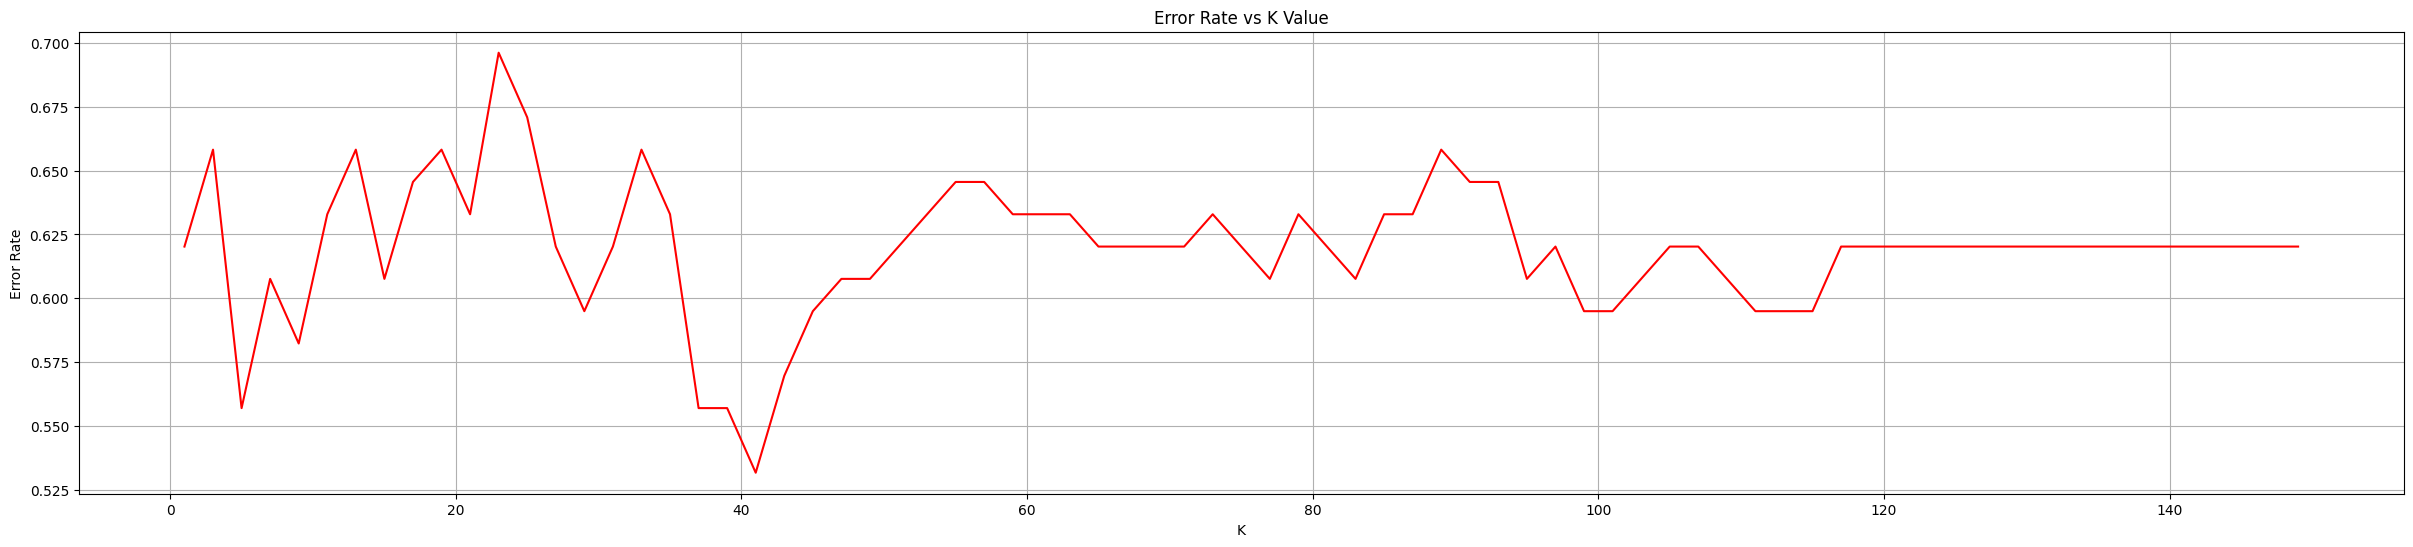

Accuracy for training data:  0.4462025316455696
Report for training data:                precision    recall  f1-score   support

        High       0.43      0.42      0.42       108
         Low       0.36      0.05      0.09        76
      Normal       0.46      0.70      0.55       132

    accuracy                           0.45       316
   macro avg       0.42      0.39      0.36       316
weighted avg       0.43      0.45      0.40       316

Accuracy for testing data:  0.46835443037974683
Report for testing data:                precision    recall  f1-score   support

        High       0.48      0.57      0.52        23
         Low       0.57      0.15      0.24        26
      Normal       0.44      0.67      0.53        30

    accuracy                           0.47        79
   macro avg       0.50      0.46      0.43        79
weighted avg       0.50      0.47      0.43        79



In [35]:
# Use the KNN algorithm, and iterate over an odd number of k neighbors to get the one with the lowest error rate (test out the options)
# Get the predictions on both training and testing data sets

error_rate = []
for k in range(1,151,2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    train_predict_y = knn.predict(x_train)
    test_predict_y = knn.predict(x_test)
    error_rate.append(np.mean (test_predict_y != y_test))

# Graph the error rates to pick the one that was lowest
plt.figure(figsize=(30, 6))
plt.plot(range(1, 151, 2), error_rate, color='red')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Error rate was lowest with 41 neighbors
knn = KNeighborsClassifier(n_neighbors=41).fit(x_train,y_train)
train_predict_y = knn.predict(x_train)
test_predict_y = knn.predict(x_test)

# Print accuracy scores and other metrics
print("Accuracy for training data: ", accuracy_score(y_train, train_predict_y))
print("Report for training data: ", classification_report(y_train, train_predict_y))
print("Accuracy for testing data: ", accuracy_score(y_test, test_predict_y))
print("Report for testing data: ", classification_report(y_test, test_predict_y))